In [197]:
import numpy as np
import math
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Questão 1

In [198]:
def bissecao(f, a, b, tol=1e-10, iteracao=9999):
    i  = 0;
    erro, x_ant = 1, a
    
    while(erro > tol) and (i < iteracao):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        
        if inf * sup != -1:
            print("Não há raiz nesse intervalo")
            return
        else:
            x = (a + b)/2.
            if f(x) == 0:
                print("A raíz é", x)
                return
            elif inf * np.sign(f(x)) == -1:
                b = x
            else: a = x
            i += 1
        erro = np.abs((x - x_ant)/np.abs(x))
        x_ant = x
    return x

In [199]:
f = lambda x: x**5+2*x**3-5*x-2

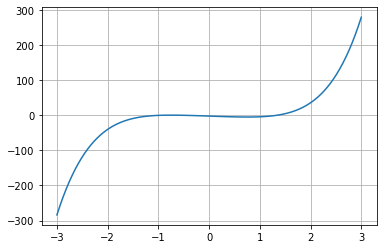

In [200]:
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))
plt.grid()

In [201]:
bissecao(f, -2, 2, 1e-4)

<ipython-input-198-c8b8fc5002a3>:21: RuntimeWarning: divide by zero encountered in double_scalars
  erro = np.abs((x - x_ant)/np.abs(x))


1.3197021484375

In [202]:
f = lambda x: ( x**2 - 2 )
bissecao(f, -1, 8, 1e-4)

1.4141082763671875

## Questão 2

In [203]:
def f(x):
    return (-0.5 * (x**2)) + 2.5*x + 4.5

### Alternativa (a)

In [204]:
x = np.linspace(-5, 10)

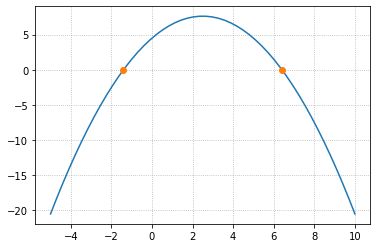

In [205]:
raiz1 = opt.root(f, -2)
raiz2 = opt.root(f, 7)
raizes = np.array([raiz1.x, raiz2.x])

fig = plt.figure()
ax = fig.add_subplot()

plt.plot(x, f(x))
ax.plot(raizes, f(raizes), 'o')
plt.grid(ls=':')

## Alternativa (b)

In [206]:
def quadratica(a, b, c):
    delta = (b**2) - (4 * a * c)
    x1 = (-b-math.sqrt(delta)) / (2 * a)
    x2 = (-b+math.sqrt(delta)) / (2 * a)
    return x1, x2

In [207]:
quadratica(-0.5, 2.5, 4.5)

(6.405124837953327, -1.405124837953327)

In [208]:
x1, x2 = np.roots([-0.5, 2.5, 4.5])
x1, x2

(6.405124837953327, -1.4051248379533272)

### Alternativa (c)

#### Erro relativo entre cada iteração

In [209]:
erros = []
raizes = []

for i in range(1,5):
    if i <= 3:
        raiz = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=i).root
        x = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=(i+1)).root
        raizes.append(raiz)
        erros.append(np.absolute(x - raiz)/x)

for i in range(len(erros)):
    print(f'Iteração: {i} \t Raiz: {raizes[i]} \t Erro: {erros[i]}')

Iteração: 0 	 Raiz: 5.0 	 Erro: 0.2
Iteração: 1 	 Raiz: 6.25 	 Erro: 0.0
Iteração: 2 	 Raiz: 6.25 	 Erro: 0.0


#### Erro relativo como valor real

In [210]:
erros2 = []
raizes2 =[]

for i in range(1,5):
    if i <= 3:
        raiz = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=i).root
        raizes2.append(raiz)
        erros2.append(np.absolute(6.405124837953327 - raiz)/6.405124837953327)

for i in range(len(erros)):
    print(f'Iteração: {i} \t Raiz: {raizes2[i]} \t Erro: {erros2[i]}')

Iteração: 0 	 Raiz: 5.0 	 Erro: 0.2193750900259293
Iteração: 1 	 Raiz: 6.25 	 Erro: 0.024218862532411636
Iteração: 2 	 Raiz: 6.25 	 Erro: 0.024218862532411636


# Questão 3

In [211]:
f = lambda x: np.sin(x) - x**3 

In [212]:
x = np.linspace(-np.pi, np.pi, 200)
y = f(x)

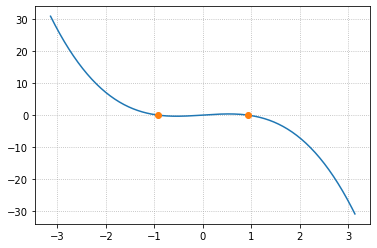

In [213]:
raiz1 = opt.root(f, -2)
raiz2 = opt.root(f, 7)
markers_on = np.array([raiz1.x, raiz2.x])

fig = plt.figure()
ax = fig.add_subplot()

plt.plot(x, y)
ax.plot(markers_on, f(markers_on), 'o')
plt.grid(ls=':')

# Questão 4

In [214]:
f = lambda x: (-2*x**6) - (1.5*x**4) + (10*x) + 20

In [215]:
x = Symbol('x')
y = (-2*x**6) - (1.5*x**4) + (10*x) + 20
derivada = y.diff(x)
derivada

-12*x**5 - 6.0*x**3 + 10

In [216]:
yprime = lambda x: (-12*x**5) - (6*x**3) + 10

In [217]:
bissecao(yprime, 0, 1, 0.05)

0.84375

# Questão 5

In [218]:
def interpolacao(f, xi, xs, tol=1e-10):
    i = 0;
    
    inf = (f(xi))
    sup = (f(xs))
    
    if inf * sup >= 0:
        return -1

    erro, x_ant = 1, xi
    
    while (erro > tol):        
        x = xs - ( ( f(xs)*(xi-xs) ) / (f(xi)-f(xs)))

        if ((f(x) * f(xi)) < 0):
            xs = x
        else: xi = x
        i += 1
        erro = np.abs((x - x_ant)/np.abs(x))
        x_ant = x
    return x

In [219]:
f = lambda x: ( x**5+2*x**3-5*x-2 )

In [220]:
bissecao(f, -2, 2)

<ipython-input-198-c8b8fc5002a3>:21: RuntimeWarning: divide by zero encountered in double_scalars
  erro = np.abs((x - x_ant)/np.abs(x))


1.319641167181544

In [221]:
interpolacao(f, -2, 2)

1.3196411670137347